# PART 3a - BASIC FORWARD FEED MULTI-LAYER PERCEPTRON MODEL 

In [1]:
## Import Libraries
import pandas as pd
import numpy as np
import time

In [2]:
# Run this to ensure TensorFlow 2.x is used
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

In [4]:
import tensorflow as tf

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [5]:
vocab_size = 10000
embedding_dim = 16
max_length = 100
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
training_size = 120000


In [ ]:
# Load dataset
from google.colab import files
uploaded = files.upload()

In [ ]:
import io
sar_df = pd.read_csv(io.BytesIO(uploaded['sar_df.csv']), index_col=0)

In [ ]:
# Randomly shuffle dataset

In [ ]:
df = sar_df.sample(frac = 1, random_state = 0)
df

,label,comment,author,subreddit,score,ups,downs,created_utc,parent_comment,w_cnt_comment,w_cnt_pcomment,pcomment_red,new_comment,new_pcomment_red,year,month,hour,comment_polar,parent_comment_polar,polar,char_count,word_count,word_density,punctuation_count,uppercase_word_count,new_comment_lemm,new_pcomment_lemm
488303,0,"Just curious, why don't you start kd over pg?",amad3000,NBA2k,1,1,0,2016-03-12 17:39:41,got about 545k mt. any(if any) suggestions on ...,9,15,got about 545k mt. any(if any) suggestions on ...,just curious why dont you start kd over pg,got about k mt anyif any suggestions on what t...,2016,3,17,-0.100000,0.000000,0.100000,45,9,4.500000,3,0,just curious why do nt you start kd over pg,get about k mt anyif any suggestion on what to...
631998,1,ELI5: why are so many mods so obsessed with sh...,turtleeatingalderman,TodayIGrandstanded,4,4,0,2015-10-18 04:55:03,Please include a small explanation (like one s...,16,17,Please include a small explanation (like one s...,eli why are so many mods so obsessed with show...,please include a small explanation like one se...,2015,10,4,0.000000,-0.250000,0.250000,90,16,5.294118,2,1,eli why be so many mod so obsess with showcase...,please include a small explanation like one se...
116487,1,"oh my god... give them a PC case, you piece of...",8funnydude,pcmasterrace,1,-1,-1,2016-11-02 05:08:00,Ascended my neighbors with some parts I had la...,13,24,Ascended my neighbors with some parts I had la...,oh my god give them a pc case you piece of wet...,ascended my neighbors with some parts i had la...,2016,11,5,-0.100000,0.000000,0.100000,56,13,4.000000,5,1,oh my god give they a pc case you piece of wet...,ascend my neighbor with some part I have lay a...
221152,0,CNN = Clinton Neocon Network,_vOv_,politics,0,0,0,2016-05-02 17:23:09,Trump nailed this on the head. CNN = Clinton N...,5,11,Trump nailed this on the head. CNN = Clinton N...,cnn clinton neocon network,trump nailed this on the head cnn clinton news...,2016,5,17,0.000000,0.000000,0.000000,28,5,4.666667,1,1,cnn clinton neocon network,trump nail this on the head cnn clinton news n...
397186,1,"all they have to do is hire micheal bay, probl...",mastergenera1,Warthunder,1,1,0,2016-04-21 13:12:19,"Quick, marketing department, we need moar expl...",11,28,"Quick, marketing department, we need moar expl...",all they have to do is hire micheal bay proble...,quick marketing department we need moar explos...,2016,4,13,0.000000,0.333333,0.333333,55,11,4.583333,1,0,all they have to do be hire micheal bay proble...,quick marketing department we need moar explos...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
616921,0,its not real peanuts.,Disheartend,runescape,1,1,0,2015-05-19 15:01:50,I'm allergic to peanuts though :(,4,6,I'm allergic to peanuts though :(,its not real peanuts,im allergic to peanuts though,2015,5,15,-0.100000,-0.750000,0.650000,21,4,4.200000,1,0,its not real peanut,I m allergic to peanut though
1006703,1,You forgot the,foxfaction,todayilearned,1,1,0,2009-12-27 14:26:31,"Yep, Adam and Eve.",3,4,"Yep, Adam and Eve.",you forgot the,yep adam and eve,2009,12,14,0.000000,0.000000,0.000000,14,3,3.500000,0,0,you forget the,yep adam and eve
61530,1,"Well, you do call yourself a destiny fan.",SmawCity,news,2,-1,-1,2016-11-11 22:58:57,I was mostly concerned with politics and law Y...,8,16,I was mostly concerned with politics and law Y...,well you do call yourself a destiny fan,i was mostly concerned with politics and law y...,2016,11,22,0.000000,0.500000,0.500000,41,8,4.555556,2,0,well you do call yourself a destiny fan,I be mostly concerned with politic and law yup...
286009,1,Cut him in half and send one half to Algeria a...,TheSereneSufi,exmuslim,1,1,0,2016-08-05 03:34:08,"Habitat? With all due respect, they are from f...",15,95,"Habitat? With all due respect, they are from f...",cut him in half and send one half to algeria a...,habitat with all due respect they are fro

In [ ]:
X = df["new_comment_lemm"].values.astype(str)
y = df['label'].values

In [ ]:
y

array([0, 1, 1, ..., 1, 1, 0])

In [ ]:
len(X)

150000

In [ ]:
sentences = []
labels = []

for i in range(len(X)):
  sentences.append(X[i])
  labels.append(y[i])
  

In [ ]:
training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]

In [ ]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)

word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [ ]:
# Need this block to get it to work with TensorFlow 2.x
import numpy as np
training_padded = np.array(training_padded)
training_labels = np.array(training_labels)
testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 16)           160000    
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 24)                408       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 25        
Total params: 160,433
Trainable params: 160,433
Non-trainable params: 0
_________________________________________________________________


In [ ]:
num_epochs = 30
history = model.fit(training_padded, training_labels, epochs=num_epochs, validation_data=(testing_padded, testing_labels), verbose=2)

Epoch 1/30
3750/3750 - 18s - loss: 0.6371 - accuracy: 0.6280 - val_loss: 0.6015 - val_accuracy: 0.6770
Epoch 2/30
3750/3750 - 15s - loss: 0.5866 - accuracy: 0.6895 - val_loss: 0.5955 - val_accuracy: 0.6831
Epoch 3/30
3750/3750 - 14s - loss: 0.5716 - accuracy: 0.7025 - val_loss: 0.6059 - val_accuracy: 0.6576
Epoch 4/30
3750/3750 - 14s - loss: 0.5603 - accuracy: 0.7098 - val_loss: 0.5936 - val_accuracy: 0.6853
Epoch 5/30
3750/3750 - 14s - loss: 0.5523 - accuracy: 0.7171 - val_loss: 0.6002 - val_accuracy: 0.6760
Epoch 6/30
3750/3750 - 15s - loss: 0.5460 - accuracy: 0.7216 - val_loss: 0.5950 - val_accuracy: 0.6851
Epoch 7/30
3750/3750 - 15s - loss: 0.5411 - accuracy: 0.7246 - val_loss: 0.5980 - val_accuracy: 0.6828
Epoch 8/30
3750/3750 - 15s - loss: 0.5355 - accuracy: 0.7278 - val_loss: 0.6003 - val_accuracy: 0.6829
Epoch 9/30
3750/3750 - 14s - loss: 0.5312 - accuracy: 0.7321 - val_loss: 0.6024 - val_accuracy: 0.6865
Epoch 10/30
3750/3750 - 14s - loss: 0.5258 - accuracy: 0.7349 - val_loss:

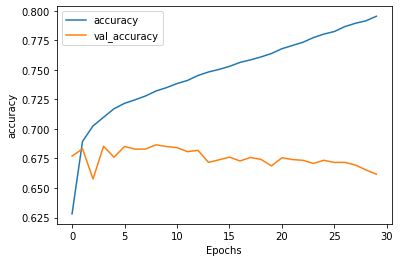

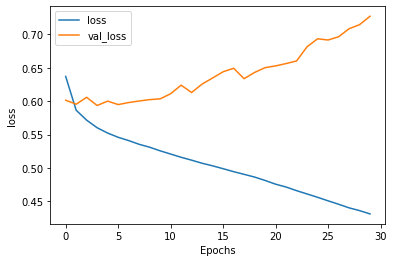

In [ ]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [ ]:
sentence = ["granny starting to fear spiders in the garden might be real", "game of thrones season finale showing this sunday night"]
sequences = tokenizer.texts_to_sequences(sentence)
padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
print(model.predict(padded))

[[0.54173595]
 [0.27295098]]
